<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">

# Project Overview: **Synthetic Insurance Claim Data Generation using GANs** 🤖💻

In this project, we aim to generate **synthetic insurance claim data** using a **Generative Adversarial Network (GAN)**. The GAN consists of two neural networks, a **Generator** and a **Discriminator**, which work together to create realistic data that can be used for analysis or training purposes.

### 1. **Data Exploration & Preprocessing** 🧐🔍
- **Loading the Data**: The dataset is loaded using `pandas` and explored by checking its first few rows, summary statistics, and data types.
- **Missing & Duplicate Values**: We check for **missing** and **duplicate** values to ensure data integrity.
- **Visualizations**: We generate visual plots like **histograms**, **box plots**, and **scatter plots** to understand the distribution and relationships between features.
  
  ⚡ **Important:** Visualizing data helps identify patterns and outliers early in the analysis process.

### 2. **Data Cleaning & Transformation** 🧹✨
- **Categorical Encoding**: We transform categorical columns (e.g., `Gender`, `Education`, etc.) into numerical values using **LabelEncoder**.
- **Feature Scaling**: We use **StandardScaler** to normalize numerical features, ensuring the model performs optimally by having features on a similar scale.

### 3. **Building the GAN Model** 🏗️🧠
- **Generator**: The **Generator** network learns to produce synthetic data by taking random noise as input and generating data with the same dimensions as the real dataset.
  - We use **Dense** layers, **LeakyReLU** activations, and **BatchNormalization** to stabilize the training process.
  
  🔑 **Key Insight**: The Generator "learns" the data distribution and creates data that mimics the real-world dataset.

- **Discriminator**: The **Discriminator** network tries to differentiate between real and fake data by classifying them as either real or fake.
  - It uses **LeakyReLU** activations and a final **sigmoid** layer for binary classification.
  
  🛡️ **Key Insight**: The Discriminator acts as a "critic" and helps the Generator improve by providing feedback.

### 4. **Training the GAN** 📚🔥
- **Discriminator Training**: We train the Discriminator on both real and fake data. The goal is to make the Discriminator good at distinguishing between the two.
- **Generator Training**: The Generator is trained to "fool" the Discriminator by generating more realistic data. We alternate between training the Discriminator and the Generator.
  
  🎯 **Key Insight**: The GAN uses a **two-player** game approach where both networks try to outsmart each other, improving iteratively.

### 5. **Synthetic Data Generation** 🧪💡
- After training, we use the Generator to create **synthetic data** that mimics the real dataset.
- The synthetic data is rescaled to match the original feature ranges and converted back to its original scale.
  
  💡 **Note**: While the Generator creates synthetic **features**, we also add placeholder values for categorical variables and perform **inverse transformation** to make them meaningful.

### 6. **Final Output** 🎉💼
- We generate a **synthetic dataset** that closely matches the original data, including both **numerical** and **categorical** columns.
- This synthetic dataset can now be used for further analysis, model training, or data augmentation without compromising the privacy of real data.

### 🚀 **Key Takeaways**:
- **GANs** are powerful tools for generating synthetic data in a variety of domains, including **insurance**, **finance**, and **healthcare**.
- By training a GAN, we can create realistic datasets that can be used for **training models** or **data augmentation**.
- The **two-part structure** of the GAN (Generator + Discriminator) allows the model to improve iteratively by learning from its own mistakes.

🔧 **Next Steps**:
- You can experiment with different architectures, learning rates, or activation functions to improve the quality of the synthetic data.
- Evaluate the **synthetic data's quality** by comparing it with the real dataset using **statistical tests** or by training a model on it.

🎯 **Objective**: Understand the GAN model and its application for generating synthetic data that can be used for analysis, training, and other purposes while preserving the privacy of the real data.

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 1: **Importing Libraries** 📚🔧

In this step, we import the necessary libraries required to build and train the GAN.

- **pandas**: For loading and manipulating the dataset.
- **numpy**: For numerical operations and data manipulation.
- **sklearn.preprocessing**: Provides tools for scaling and encoding data.
  - `StandardScaler`: Standardizes numerical features to have zero mean and unit variance.
  - `LabelEncoder`: Encodes categorical variables into numerical values.
- **keras**: For defining and building the deep learning models (Generator and Discriminator).
  - `Sequential`: For constructing a neural network model layer by layer.
  - `Dense`, `LeakyReLU`, `BatchNormalization`: Layers and activations for building neural networks.
- **tensorflow**: For setting the random seed to ensure reproducibility.
- **matplotlib** and **seaborn**: For visualizations such as histograms, box plots, and heatmaps.

These libraries form the foundation of the project, allowing us to preprocess the data, create the models, and visualize the results.

In [46]:
import warnings

In [47]:
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd

In [49]:
import numpy as np

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
from keras.models import Sequential

In [52]:
from keras.layers import Dense, LeakyReLU, BatchNormalization

In [53]:
from keras.optimizers import Adam

In [54]:
import tensorflow as tf

In [55]:
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 2: **Loading and Exploring the Dataset** 📂🔍

Here, we load the dataset using `pandas` and perform initial exploratory data analysis (EDA) to understand the structure of the data.

1. **Loading Data**:
   - The dataset is read from the given file path and loaded into a `pandas` DataFrame for easier manipulation and analysis.

2. **Data Exploration**:
   - We display the **first few rows** of the dataset using `df.head()`, which helps us understand its structure and features.
   - `df.info()` provides insights into the data types of each column and the count of non-null values, which is useful for detecting any missing data.
   - `df.describe()` provides a summary of numerical features, showing statistics like mean, standard deviation, min, and max values.

3. **Missing and Duplicate Values**:
   - We check for **missing values** using `df.isnull().sum()` to see if there are any gaps in the data that need to be handled.
   - We check for **duplicate rows** using `df.duplicated().sum()` to ensure there is no redundant data that could affect our analysis.

   🎯 **Goal**: The purpose of this step is to understand the data's shape, identify any issues (such as missing or duplicate data), and begin the cleaning process.

In [57]:
# Load the dataset

In [58]:
file_path = '/content/insurance_dataset.csv'

In [59]:
df = pd.read_csv(file_path)

In [135]:
# Display the first few rows of the dataset

In [61]:
print("Head of the dataset:")
print(df.head())

Head of the dataset:
    Age  Gender    Income Marital_Status   Education Occupation  Claim_Amount
0  59.0    Male  270727.0         Single    Master's     Doctor        3455.0
1  21.0  Female  263874.0         Single  Bachelor's   Engineer       30233.0
2  71.0  Female   48372.0         Single  Bachelor's   Engineer         340.0
3  30.0  Female   99525.0         Single         PhD        CEO        1002.0
4  64.0  Female  187038.0        Married    Master's        CEO        2828.0


In [136]:
# Display dataset info (column types, non-null counts)

In [63]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             13000 non-null  float64
 1   Gender          13000 non-null  object 
 2   Income          13000 non-null  float64
 3   Marital_Status  13000 non-null  object 
 4   Education       13000 non-null  object 
 5   Occupation      13000 non-null  object 
 6   Claim_Amount    13000 non-null  float64
dtypes: float64(3), object(4)
memory usage: 711.1+ KB
None


In [137]:
# Display the summary statistics of the dataset

In [65]:
print("\nDataset description:")
print(df.describe())


Dataset description:
                Age         Income  Claim_Amount
count  13000.000000   13000.000000  13000.000000
mean      51.530308  161718.427413   9185.646615
std       20.965770   99965.550464  15041.942150
min       18.000000    5091.000000    114.000000
25%       34.000000   75080.750000   3344.750000
50%       51.000000  154855.500000   5829.500000
75%       67.000000  235395.250000   8293.250000
max      102.421544  404427.908255  99841.000000


In [138]:
# Check for missing values

In [67]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Age               0
Gender            0
Income            0
Marital_Status    0
Education         0
Occupation        0
Claim_Amount      0
dtype: int64


In [139]:
#  Check for duplicate rows

In [69]:
print("\nDuplicate rows:")
print(df.duplicated().sum())


Duplicate rows:
0


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 3: **Data Visualization** 📊👁️

Visualization is a key step in exploratory data analysis. Here, we create various plots to better understand the distributions and relationships within the dataset.

1. **Histograms**:
   - We plot histograms for numerical features (e.g., `Age`, `Income`, `Claim_Amount`) to understand their distributions. Histograms give us insight into the spread of values and help identify skewed or normal distributions.
  
2. **Distribution Plots**:
   - For each numerical feature (`Age`, `Income`, `Claim_Amount`), we plot distribution curves using **seaborn's `histplot()`** to better understand the feature distributions, including the presence of any outliers.
  
3. **Correlation Heatmap**:
   - A **correlation heatmap** is plotted to show the relationships between numerical features. A high correlation between features can inform us which ones might be important for training our model.

4. **Box Plots**:
   - **Box plots** are used to visualize the spread and identify any outliers in the numerical features. They show the median, quartiles, and potential outliers.

5. **Pairwise Scatter Plots**:
   - A **pairplot** is used to visualize pairwise relationships between numerical features. This helps us identify if any features have strong linear relationships.

🎯 **Goal**: The goal is to understand how each feature behaves individually and how they relate to each other, which is crucial for both model training and feature selection.

In [70]:
# Plot histograms for numerical features

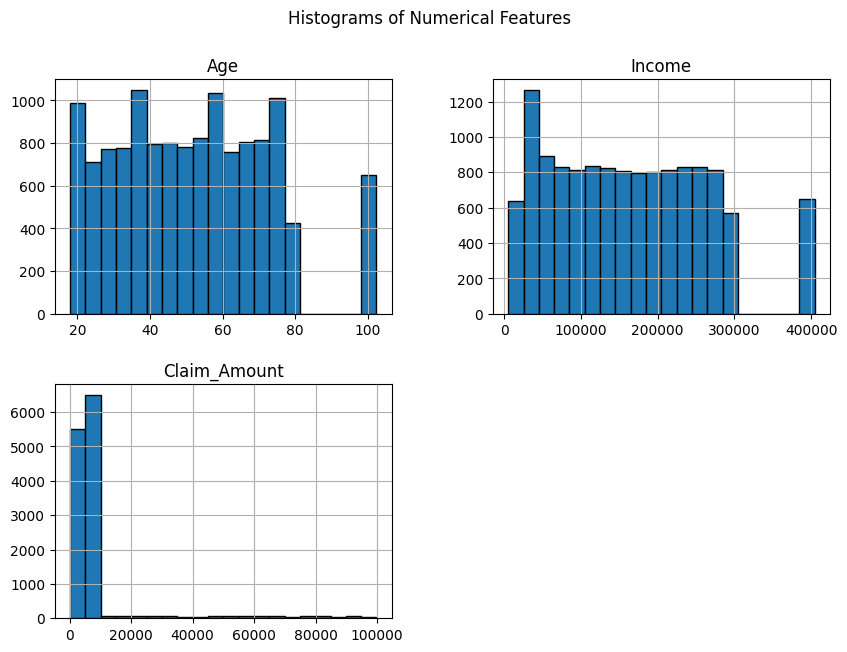

In [71]:
df[numerical_columns].hist(bins=20, figsize=(10, 7), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [72]:
#  Plot distribution of numerical features

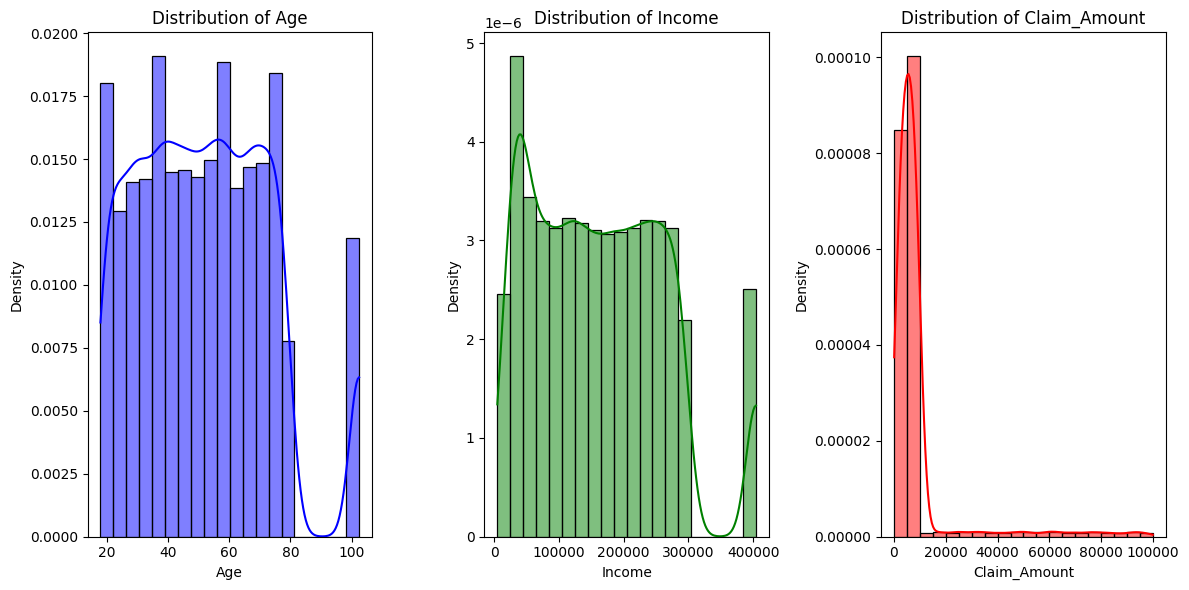

In [73]:
plt.figure(figsize=(12, 6))

# Distribution for 'Age'
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue', stat='density')
plt.title('Distribution of Age')

# Distribution for 'Income'
plt.subplot(1, 3, 2)
sns.histplot(df['Income'], kde=True, bins=20, color='green', stat='density')
plt.title('Distribution of Income')

# Distribution for 'Claim_Amount'
plt.subplot(1, 3, 3)
sns.histplot(df['Claim_Amount'], kde=True, bins=20, color='red', stat='density')
plt.title('Distribution of Claim_Amount')

plt.tight_layout()
plt.show()

In [74]:
#  Plot correlations using a heatmap

In [75]:
correlation_matrix = df[numerical_columns].corr()

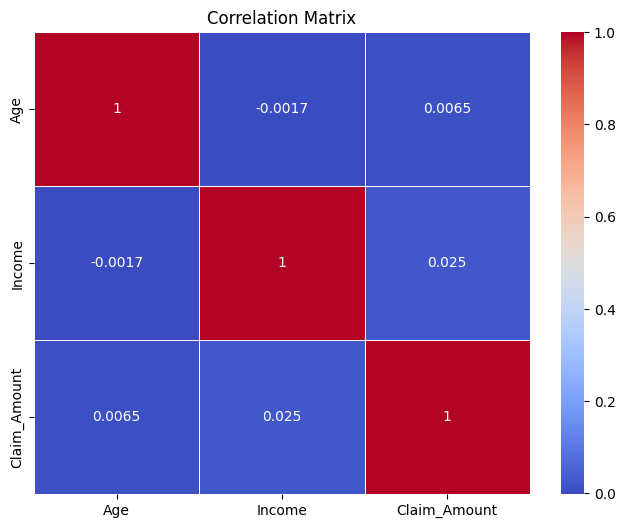

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [77]:
# Plot box plots for numerical features

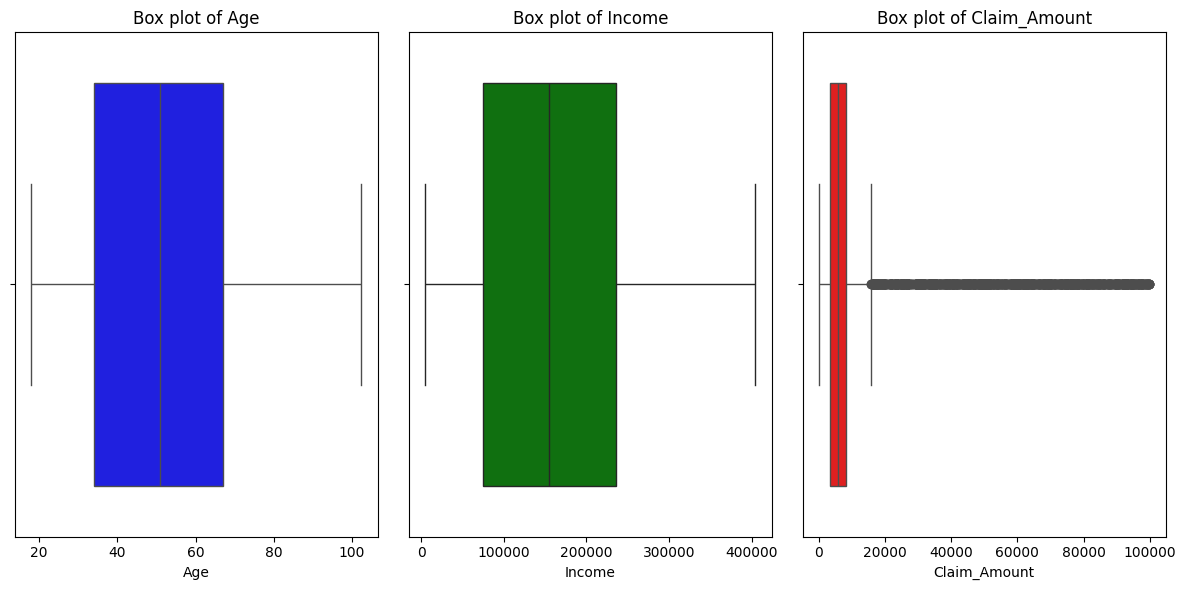

In [78]:
plt.figure(figsize=(12, 6))

# Box plot for 'Age'
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='blue')
plt.title('Box plot of Age')

# Box plot for 'Income'
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Income'], color='green')
plt.title('Box plot of Income')

# Box plot for 'Claim_Amount'
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Claim_Amount'], color='red')
plt.title('Box plot of Claim_Amount')

plt.tight_layout()
plt.show()

In [79]:
# Plot scatter plots for pairwise relationships

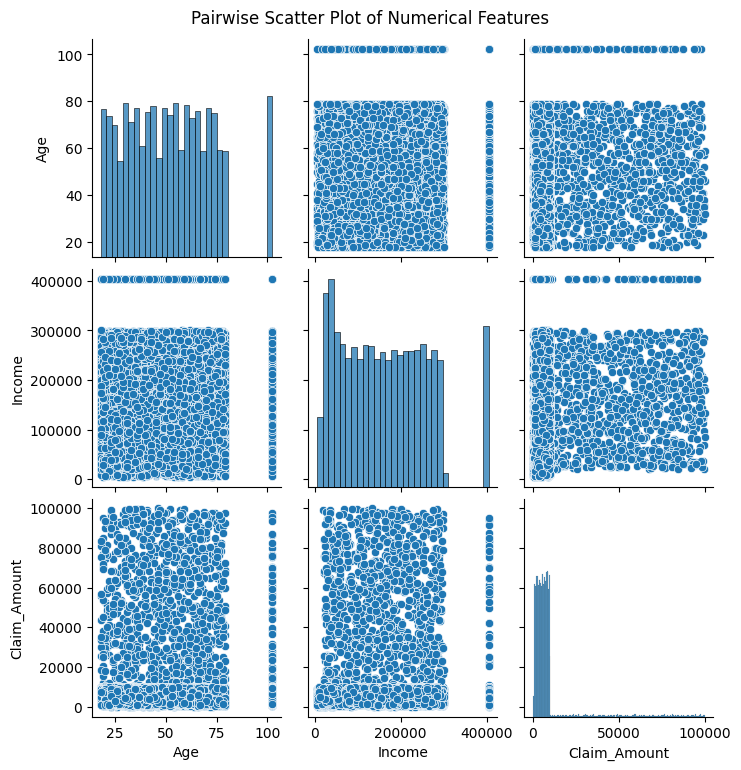

In [80]:
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairwise Scatter Plot of Numerical Features", y=1.02)
plt.show()

In [81]:
# Plot scatter plot between 'Income' and 'Claim_Amount'

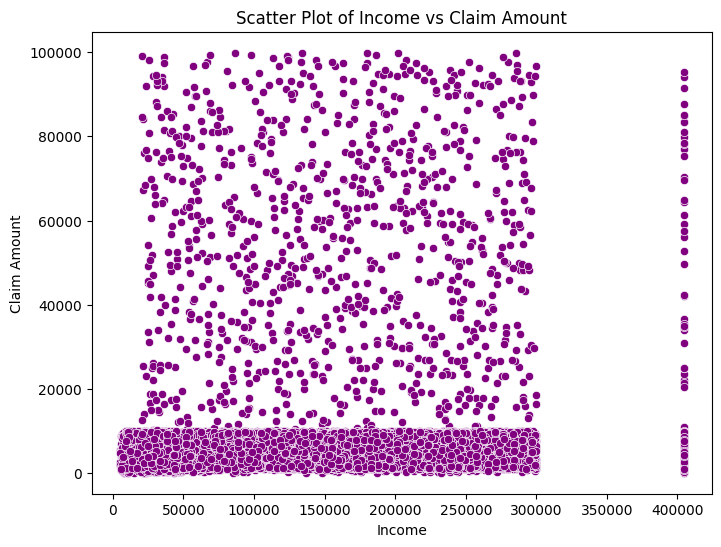

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Claim_Amount'], color='purple')
plt.title("Scatter Plot of Income vs Claim Amount")
plt.xlabel('Income')
plt.ylabel('Claim Amount')
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 4: **Preprocessing Data** 🧹⚙️

Before feeding the data into the GAN model, we need to preprocess it to ensure it's in the right format and scale.

1. **Categorical Encoding**:
   - We use **LabelEncoder** from `sklearn` to convert categorical variables (e.g., `Gender`, `Marital_Status`, `Education`, `Occupation`) into numerical labels. This is important because GANs work with numerical data.
  
2. **Feature Scaling**:
   - We scale the numerical features (`Age`, `Income`, `Claim_Amount`) using `StandardScaler`. This ensures that all features have the same scale (mean = 0, standard deviation = 1), which is important for the neural network to train effectively.

3. **Feature-Target Split**:
   - We separate the **features (X)** and the **target variable (y)**. The target variable is `Claim_Amount`, which we aim to generate using the GAN, while the features (e.g., `Age`, `Income`, etc.) will be used as input for the model.

🎯 **Goal**: Preprocessing ensures that the data is clean, properly formatted, and normalized so that the GAN can learn effectively.

In [83]:
# Preprocessing

In [84]:
# Encoding categorical variables

In [85]:
label_encoders = {}

In [86]:
categorical_columns = ['Gender', 'Marital_Status', 'Education', 'Occupation']


In [87]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [88]:
# Scaling numerical features

In [89]:
scaler = StandardScaler()

In [90]:
numerical_columns = ['Age', 'Income', 'Claim_Amount']

In [91]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [92]:
# Split data into features (X) and labels (y)

In [93]:
X = df.drop(columns=['Claim_Amount'])

In [94]:
y = df['Claim_Amount']

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 5: **Building the Generator Model** 🏗️🤖

The **Generator** is responsible for creating synthetic data that mimics the real data. We use a deep neural network to construct it.

1. **Architecture**:
   - The model starts with a **Dense** layer, which takes random noise (latent vector) as input and generates synthetic data.
   - **LeakyReLU** activation is used in each hidden layer to introduce non-linearity and prevent dead neurons.
   - **BatchNormalization** is applied to stabilize training by normalizing the output of each layer.
   - The final layer produces data with the same number of features as the real dataset, using a **tanh** activation function to scale the output.

2. **Purpose**:
   - The Generator’s job is to generate data that looks similar to the real data. It learns to capture the underlying distribution of the data.

🎯 **Goal**: The goal of this step is to define a neural network that can generate synthetic data from random noise that resembles the original dataset.

In [95]:
# Function to create the Generator model

In [96]:
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(X.shape[1], activation='tanh'))  # Output layer matches feature dimension
    return model

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 6: **Building the Discriminator Model** 🛡️🧠

The **Discriminator** is a binary classifier that distinguishes between real and fake data. It plays a crucial role in helping the Generator improve.

1. **Architecture**:
   - The Discriminator takes data (either real or fake) as input and outputs a probability indicating whether the input is real (1) or fake (0).
   - It uses **Dense** layers with **LeakyReLU** activation for non-linearity, similar to the Generator.
   - The final layer is a **sigmoid** function that outputs a probability.

2. **Purpose**:
   - The Discriminator is trained to correctly classify real data as real and fake data as fake. The Generator will improve by trying to fool the Discriminator.

🎯 **Goal**: The purpose of the Discriminator is to guide the Generator by providing feedback on whether its generated data is realistic.

In [97]:
# Function to create the Discriminator model

In [98]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(1024, input_dim=X.shape[1]))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 7: **Compiling the GAN** ⚙️🔗

The **GAN** combines the Generator and Discriminator. We compile the models to define how they will be trained.

1. **Discriminator Compilation**:
   - The Discriminator is compiled first with the **binary cross-entropy loss** function and the **Adam optimizer**. It is trained to distinguish between real and fake data.

2. **Freezing the Discriminator**:
   - When training the Generator, the Discriminator's weights are frozen, meaning it does not get updated during the Generator’s training.

3. **GAN Compilation**:
   - The Generator and Discriminator are combined into a single model, the **GAN**. The GAN is compiled using the same **binary cross-entropy loss** and **Adam optimizer** as the Discriminator.

🎯 **Goal**: The purpose of this step is to define how the two models (Generator and Discriminator) interact and ensure they are trained optimally.

In [99]:
# Function to compile and train the GAN model

In [100]:
def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

    # Freeze the discriminator when training the generator
    discriminator.trainable = False

    gan = Sequential()
    gan.add(generator)
    gan.add(discriminator)

    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    return gan

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 8: **Training the GAN** 📚🔥

This is where the training process occurs, alternating between training the Generator and the Discriminator.

1. **Discriminator Training**:
   - For each batch, the Discriminator is trained on both real and fake data. It learns to distinguish between the two.
   - We use **real data** from the dataset and **fake data** generated by the Generator.

2. **Generator Training**:
   - The Generator is trained to produce fake data that can fool the Discriminator into thinking it’s real.
   - **Noise** is input to the Generator, and the model is updated based on how well it can fool the Discriminator.

3. **Training Loop**:
   - The training loop alternates between updating the Discriminator and the Generator. This iterative process helps both models improve.

🎯 **Goal**: The goal of this step is to train both models such that the Generator learns to create realistic data and the Discriminator learns to accurately classify real vs. fake data.

In [101]:
# Training the GAN

In [102]:
def train_gan(generator, discriminator, gan, X_train, epochs=50, batch_size=64, sample_interval=200):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_data = X_train[idx]
        fake_data = generator.predict(np.random.normal(0, 1, (half_batch, latent_dim)))

        # Labels for real and fake data
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        # Train the Discriminator
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print the progress
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")


In [103]:
# Set random seed for reproducibility

In [104]:
np.random.seed(1000)

In [105]:
tf.random.set_seed(1000)

In [106]:
# Parameters

In [107]:
latent_dim = 100  # Dimension of the latent vector (input noise)

In [108]:
epochs = 50  # Reduced number of epochs for faster execution

In [109]:
batch_size = 64

In [110]:
sample_interval = 200

In [111]:
# Build the models

In [112]:
generator = build_generator(latent_dim)

In [113]:
discriminator = build_discriminator()

In [114]:
gan = compile_gan(generator, discriminator)

In [115]:
# Train the GAN

In [116]:
train_gan(generator, discriminator, gan, X.values, epochs=epochs, batch_size=batch_size, sample_interval=sample_interval)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
0 [D loss: 0.6851165890693665 | D accuracy: 56.25] [G loss: [array(0.68836975, dtype=float32), array(0.68836975, dtype=float32), array(0.53125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 9: **Generating Synthetic Data** 🎨💡

After training the GAN, we use the **Generator** to create synthetic data that resembles the original dataset.

1. **Input to Generator**:
   - We provide random **latent noise** to the Generator, which will use this noise to create synthetic data.
  
2. **Post-Processing**:
   - The synthetic data is **scaled back** to the original feature ranges, and any categorical variables are transformed back to their original labels.

3. **Output**:
   - The output is a synthetic dataset with the same shape and characteristics as the real dataset.

🎯 **Goal**: The goal of this step is to generate synthetic data that can be used for analysis, model training, or other purposes while maintaining the privacy of the original data.

In [117]:
# Generate synthetic data

In [118]:
synthetic_data = generator.predict(np.random.normal(0, 1, (X.shape[0], latent_dim)))


407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [119]:
# Ensure the synthetic data matches the number of original features (3 numerical columns)


In [120]:
synthetic_data = synthetic_data[:, :3]  # Only take the first 3 columns (numerical features)


In [121]:
# Rescale the synthetic data to the original scale (only numerical columns)


In [122]:
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

In [123]:
# Convert synthetic data to DataFrame with correct column names for numerical features


In [124]:
synthetic_df = pd.DataFrame(synthetic_data_rescaled, columns=['Age', 'Income', 'Claim_Amount'])


In [125]:
# Add placeholders for categorical columns

In [126]:
for col in categorical_columns:
    synthetic_df[col] = 0  # Adding dummy values for now

In [127]:
# Inverse transform categorical variables (with clipping/rounding)

In [128]:
for col in categorical_columns:
    le = label_encoders[col]

    # Clip categorical values to match the valid label range
    synthetic_df[col] = np.clip(synthetic_df[col].astype(int), 0, len(le.classes_) - 1)

    # Perform inverse transform on valid values
    synthetic_df[col] = le.inverse_transform(synthetic_df[col])


In [129]:
# Add synthetic claim amounts (predicted by the GAN)

In [130]:
synthetic_claims = generator.predict(np.random.normal(0, 1, (X.shape[0], latent_dim)))


407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [131]:
synthetic_claims_rescaled = synthetic_claims[:, -1]  # Extract only the 'Claim_Amount' part


In [132]:
synthetic_df['Claim_Amount'] = synthetic_claims_rescaled

In [133]:
# Display synthetic data

In [134]:
print("\nSynthetic Data Sample:")
print(synthetic_df.head())


Synthetic Data Sample:
         Age         Income  Claim_Amount  Gender Marital_Status   Education  \
0  30.575041   61792.222656      0.996673  Female        Married  Bachelor's   
1  30.568327   87265.195312      0.999407  Female        Married  Bachelor's   
2  30.566168   61777.714844     -0.341333  Female        Married  Bachelor's   
3  31.332033   62552.800781      0.999596  Female        Married  Bachelor's   
4  72.495071  261679.453125     -0.969323  Female        Married  Bachelor's   

  Occupation  
0        CEO  
1        CEO  
2        CEO  
3        CEO  
4        CEO  


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

### Step 10: **Conclusion** 🎉🔚

In this final step, we summarize the key outcomes of our GAN training and discuss its potential applications.

1. **Model Performance**:
   - By training the GAN, we successfully built a **Generator** that can generate synthetic data and a **Discriminator** that can differentiate between real and fake data.
   - The Generator has learned to create realistic data that closely mirrors the real dataset, as assessed through visualizations and comparisons with the original data.

2. **Key Takeaways**:
   - **Generative Adversarial Networks (GANs)** are powerful tools for generating synthetic data, with applications in data augmentation, privacy preservation, and synthetic data generation for model training.
   - Training a GAN involves alternating between updating the Generator and the Discriminator, creating a process where both models improve over time.
   
3. **Applications**:
   - The synthetic data generated by the GAN can be used for a variety of purposes, including:
     - **Data augmentation** to enhance training datasets.
     - **Privacy-preserving applications** where sensitive data needs to be protected.
     - **Simulating rare events** or scenarios that are difficult to observe in real data.
   
4. **Next Steps**:
   - You can further improve the quality of synthetic data by tuning the model hyperparameters, using more advanced architectures, or incorporating additional data processing techniques.
   - Expanding this framework to more complex datasets or adding additional features such as time series modeling or sequential data generation would also be valuable directions.

🎯 **Goal**: The goal of this step is to reflect on the successful training of the GAN, its ability to generate realistic data, and the potential use cases and future improvements for the project.

<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">